![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

## Problem Statement



# Street View Housing Number Digit Recognition

The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications such as Autonomous vehicles. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate into all sorts of projects.

#### Objective:
Given the testing and training data, can you train a model that accurately identifies house numbers in an image (with difficulties like picture brightness, blurriness)?

### Package version
- tensorflow==2.2.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Visualize and Standardize the data

6. Model Building

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

Let us now, load the dataset that is available as a .h5 file

In [5]:
import h5py

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

## 4.  Data Analysis and Preparation

In [6]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

Let us see the contents of features and labels of one example from the images

In [7]:
X_train[:1]    

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [8]:
y_train[:1]

array([2], dtype=uint8)

In [9]:
X_test[:1]

array([[[ 40.558 ,  46.7917,  48.9764, ..., 112.1153, 112.9904,
         112.1646],
        [ 39.4379,  44.2911,  47.1768, ..., 111.0122, 110.9475,
         109.9368],
        [ 38.4488,  43.6394,  48.7098, ..., 109.8921, 109.9414,
         109.1048],
        ...,
        [ 34.9869,  35.4707,  39.6676, ..., 109.211 , 109.9074,
         112.7346],
        [ 35.6602,  35.5462,  40.3193, ..., 110.9998, 112.049 ,
         114.3431],
        [ 36.1871,  35.4214,  40.6998, ..., 110.0169, 111.2017,
         114.1906]]], dtype=float32)

In [10]:
y_test[:1]

array([1], dtype=uint8)

## 5. Visualize and Standardize the data

Let us try visualising the first 10 images in the dataset.

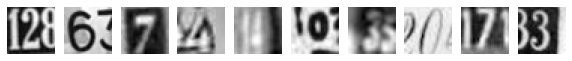

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [11]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

Let us check the shape of the data

In [12]:
X_train.shape

(42000, 32, 32)

In [13]:
y_train.shape

(42000,)

Need to reshape the X_train and X_test so that the same can be fed for model building. We need to feed a 2D tensor into the model and currently we have a 3D tensor. 

- We will normalize the data. We divide by 255 as this is a grayscale image and can take values from 0-255


In [14]:
X_train = X_train.reshape(X_train.shape[0], 1024, 1)
X_test = X_test.reshape(X_test.shape[0], 1024, 1)

# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print('Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

Resized Training set (42000, 1024, 1) (42000,)
Resized Test set (18000, 1024, 1) (18000,)


Encoding the target variables. We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [15]:
from tensorflow.keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)

The number of classes in this dataset are: 10


## 6. Model building

#### Let us now build the neural network model, fit the training data, test it and provide model summary. Feel free to play around with the network and get to a better solution.

In [16]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

Let us create an object of our model

In [17]:
# build the model
model = nn_model()

In [18]:
# Compile model
sgd = optimizers.Adam(lr=1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) ### Loss function = Categorical cross entropy

Let us fit our model on the training dataset along with it's equivalent one hot encoded labels

In [19]:
# Fit the model
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 1s - loss: 2.2881 - accuracy: 0.1320 - val_loss: 2.1912 - val_accuracy: 0.2281
Epoch 2/100
140/140 - 1s - loss: 1.8868 - accuracy: 0.3386 - val_loss: 1.7101 - val_accuracy: 0.4028
Epoch 3/100
140/140 - 1s - loss: 1.5561 - accuracy: 0.4687 - val_loss: 1.4668 - val_accuracy: 0.5079
Epoch 4/100
140/140 - 1s - loss: 1.4262 - accuracy: 0.5250 - val_loss: 1.3403 - val_accuracy: 0.5632
Epoch 5/100
140/140 - 1s - loss: 1.3132 - accuracy: 0.5752 - val_loss: 1.2405 - val_accuracy: 0.6064
Epoch 6/100
140/140 - 1s - loss: 1.2472 - accuracy: 0.6022 - val_loss: 1.2083 - val_accuracy: 0.6141
Epoch 7/100
140/140 - 1s - loss: 1.1769 - accuracy: 0.6292 - val_loss: 1.1543 - val_accuracy: 0.6401
Epoch 8/100
140/140 - 1s - loss: 1.1428 - accuracy: 0.6416 - val_loss: 1.1155 - val_accuracy: 0.6561
Epoch 9/100
140/140 - 1s - loss: 1.1182 - accuracy: 0.6496 - val_loss: 1.1613 - val_accuracy: 0.6379
Epoch 10/100
140/140 - 1s - loss: 1.0976 - accuracy: 0.6561 - val_loss: 1.1382 - val_accura

# 7. Conclusion and Interpretation


In [20]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6804450750350952
Accuracy: 0.8059999942779541


Text(0.5, 1.0, 'Training and validation loss')

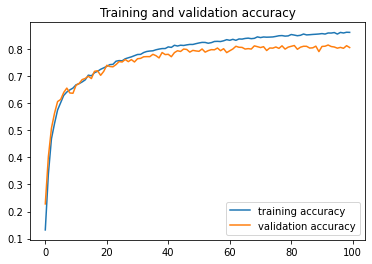

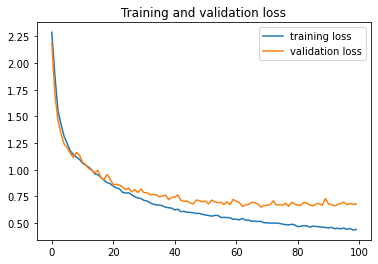

In [21]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

There are around 10 classes in the dataset which represent digits from 0-9.

We tried training a Neural Network with dense hidden layers of different number of units and are able to achieve a final test accuracy of 80.74 %. 

Also we notice that after a certain point the model begins to overfit on our dataset as is clear from the plots above where the validation loss begins to increase after certain point and validation accuracy begins to decrease.

Thus, with this amount of accuracy we are able to distinguish between the different digits in this dataset.


## Further explore

Can you try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the one in this notebook? 